In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', -1)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.isnull().sum()

PassengerId    0  
Survived       0  
Pclass         0  
Name           0  
Sex            0  
Age            177
SibSp          0  
Parch          0  
Ticket         0  
Fare           0  
Cabin          687
Embarked       2  
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


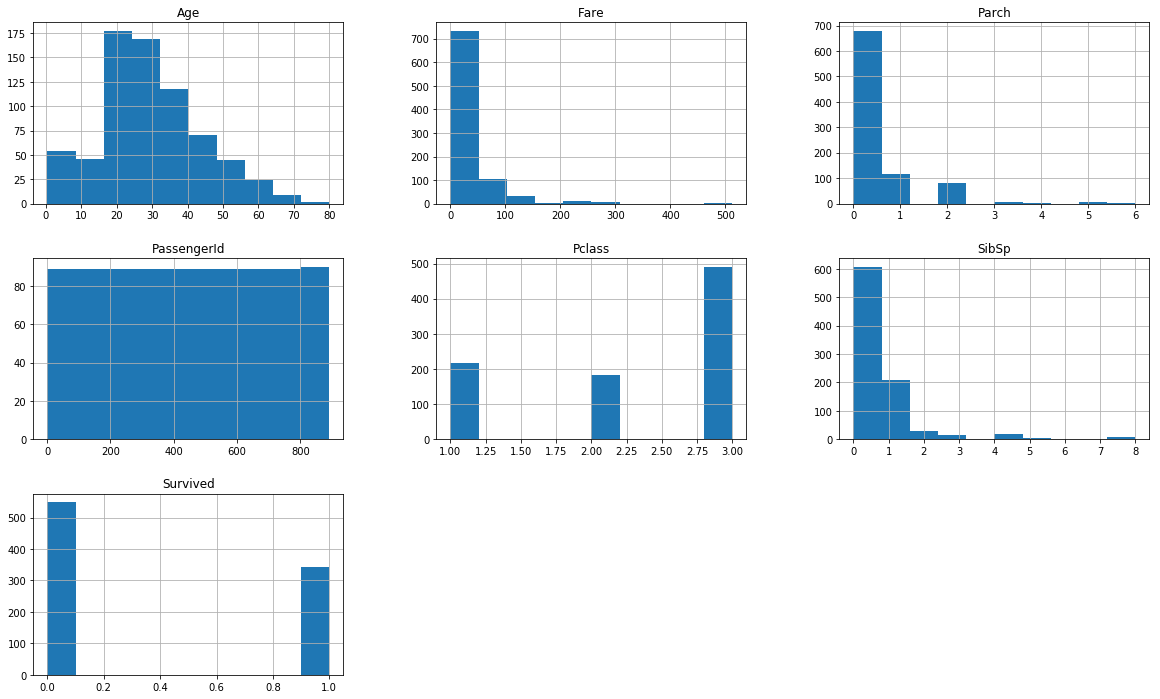

In [7]:
df_train.hist(figsize=(20,12))
plt.show()

In [8]:
palette = {1:"seagreen", 0:"grey"}

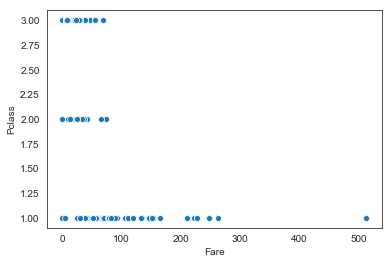

In [9]:
sns.set_style('white')

sns.scatterplot(data=df_train, x='Fare',y='Pclass')
plt.show()

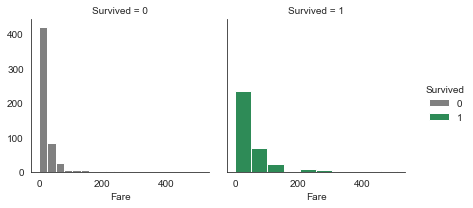

In [10]:
sns.set_style('white')

g = sns.FacetGrid(df_train, hue="Survived", col="Survived", margin_titles=True,
                  palette=palette)
g=g.map(plt.hist, "Fare",edgecolor="w").add_legend();
plt.show()

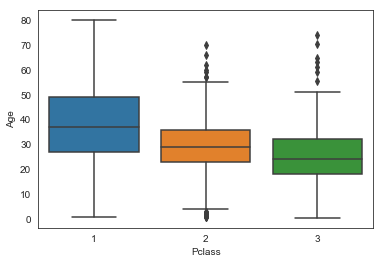

In [11]:
sns.set_style('white')

sns.boxplot(data=df_train, x='Pclass', y='Age')
plt.show()

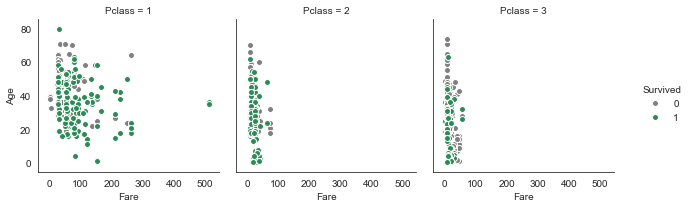

In [12]:
sns.set_style('white')

g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", margin_titles=True,
                  palette=palette)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

plt.show()

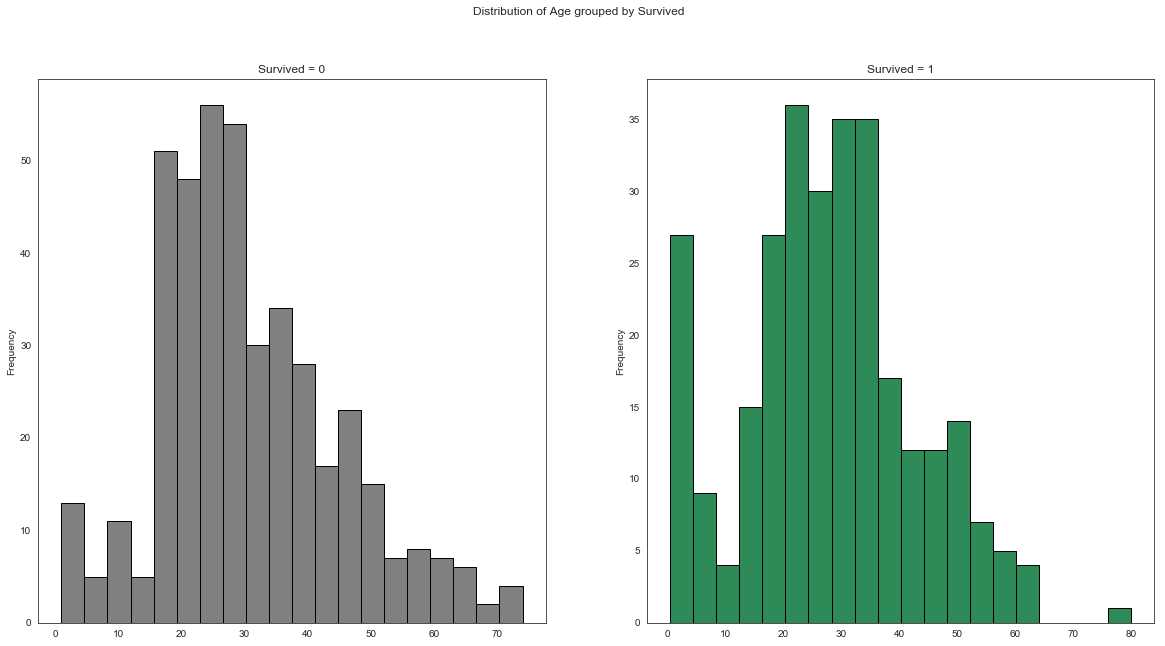

In [13]:
f,ax=plt.subplots(1,2,figsize=(20,10))

df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='grey')
ax[0].set_title('Survived = 0')


df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='seagreen')
ax[1].set_title('Survived = 1')

f.suptitle('Distribution of Age grouped by Survived')

plt.show()

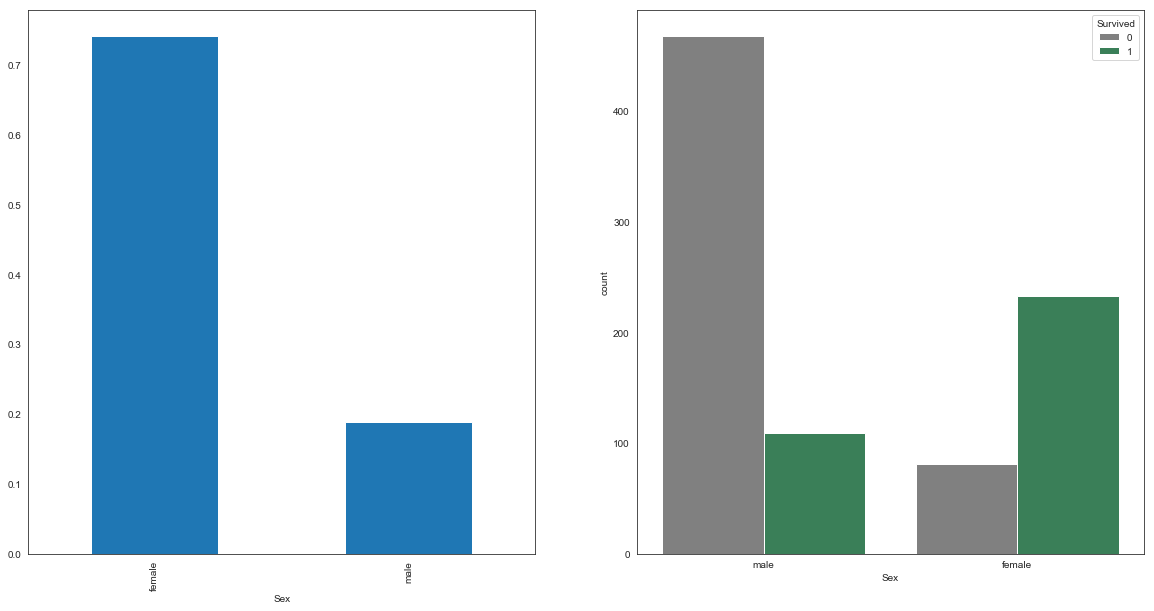

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,10))

df_train[['Sex','Survived']].groupby('Sex')['Survived'].mean().plot.bar(ax=ax[0])

sns.countplot(data=df_train, x='Sex', hue='Survived', ax=ax[1], palette={0:'grey',1:'seagreen'})

plt.show()

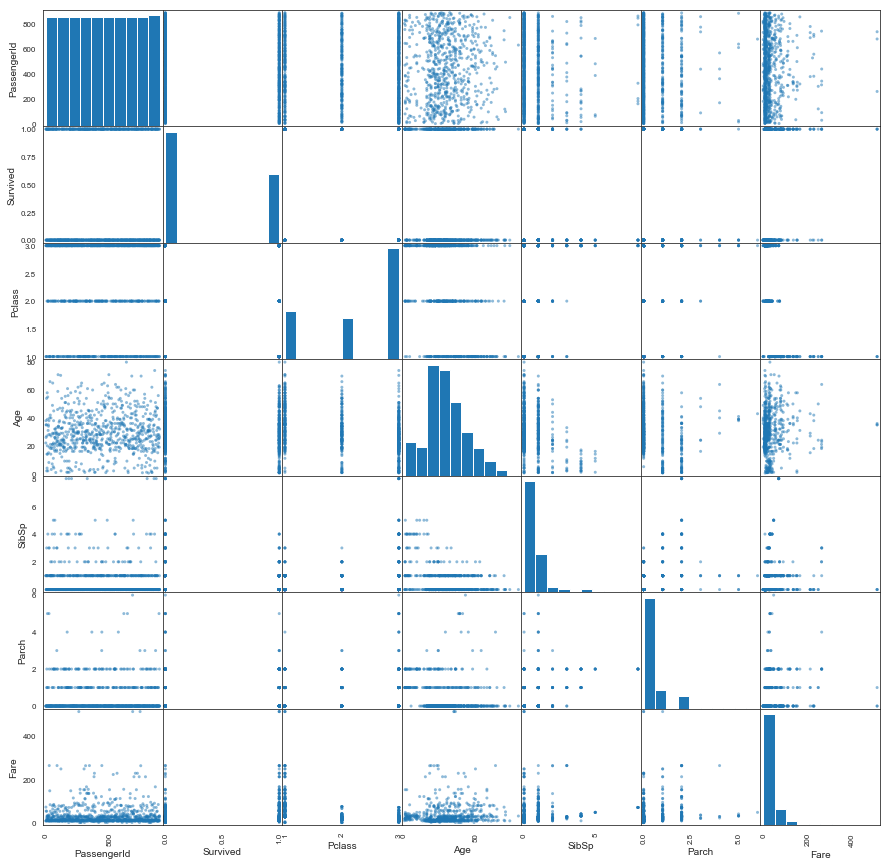

<Figure size 432x288 with 0 Axes>

In [15]:
pd.plotting.scatter_matrix(df_train,figsize=(15,15))
plt.figure()
plt.show()

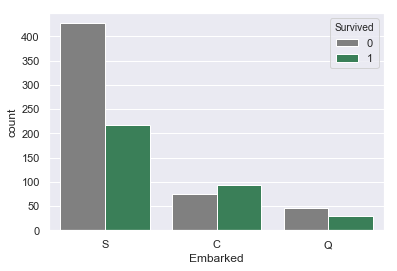

In [16]:
sns.set()

sns.countplot(data=df_train, x='Embarked', hue='Survived', palette=palette)

In [17]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
def impute_age_by_title(df):
    
    df_title_mean = df.groupby(['Title', 'Pclass'])['Age'].mean().reset_index()
    df_title_mean.columns = ['Title', 'Pclass', "MeanAge"]
    df = df.merge(df_title_mean, left_on=['Title', 'Pclass'], right_on=['Title', 'Pclass'], how='left')
    df['Age'] = df['Age'].fillna(pd.to_numeric(df['MeanAge']))
    df = df.drop('MeanAge', axis=1)
    return df

def bin_age(df):
    df['Age'] = df['Age'].astype(int)
    df.loc[ df['Age'] < 11, 'AgeBin'] = 0
    df.loc[(df['Age'] >= 11) & (df['Age'] < 19), 'AgeBin'] = 1
    df.loc[(df['Age'] >= 19) & (df['Age'] < 29), 'AgeBin'] = 2
    df.loc[(df['Age'] >= 29) & (df['Age'] < 36), 'AgeBin'] = 3
    df.loc[(df['Age'] >= 36) & (df['Age'] < 52), 'AgeBin'] = 4
    df.loc[(df['Age'] >= 52) & (df['Age'] < 67), 'AgeBin'] = 5
    df.loc[ df['Age'] >=67, 'AgeBin'] = 6
    return df
    
def bin_fare(df):
    df.loc[ df['Fare'] < 7.92, 'FareBin'] = 0
    df.loc[(df['Fare'] >= 7.92) & (df['Fare'] < 14.45), 'FareBin'] = 1
    df.loc[(df['Fare'] >= 14.45) & (df['Fare'] < 31.01), 'FareBin'] = 2
    df.loc[ df['Fare'] >= 31.01, 'FareBin'] = 3
    return df
    
    
def impute_embarked(df):
    df['Embarked'] = df['Embarked'].fillna('S')
    return df
    
def simple_cabin(df):
    df['Cabin'] = df['Cabin'].fillna('M')
    df['Cabin'] = df['Cabin'].apply(lambda x : x[0])
    df = df[df['Cabin'] != 'T']
    return df

def process_names(df):
    french_to_english = {'Mme.':'Mrs.', 'Mlle.':'Ms.', 'Lady.':'Royalty', 'Sir.': 'Royalty', 'Countess.': 'Royalty'}
    common_title = ['Mr.', 'Mrs.', 'Miss.', 'Ms.', 'Master.', 'Royalty']
#     df['LastName'] = df['Name'].apply(lambda x : x.split(' ')[0])
    df['Title'] = df['Name'].apply(lambda x : [tok for tok in x.split(' ') if '.' in tok][0])
    df['Title'] = df['Title'].apply(lambda x : french_to_english[x] if x in french_to_english else x)
    df['Title'] = df['Title'].apply(lambda x : x if x in common_title else 'Others')
    df = df.drop('Name', axis=1)
    return df

def get_family(df):
    df['FamilyCount'] = df['SibSp'] + df['Parch'] + 1
    df['Alone'] = df['FamilyCount'].apply(lambda x : 1 if x == 1 else 0)
    df['SFamily'] = df['FamilyCount'].apply(lambda x : 1 if x > 1 and x < 5 else 0)
    df['LFamily'] = df['FamilyCount'].apply(lambda x : 1 if x > 5 else 0)
#     df['Alone'] = df['FamilyCount'].apply(lambda x : 1 if x == 0 else 0)
    return df

def drop_passid_tick(df):
    df = df.drop(['PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1)
    return df

def pclass_cat(df):
    df['Pclass'] = df['Pclass'].astype('category')
    return df

def one_hot_encode(df):
    num_features = ['Alone', 'SFamily', 'LFamily']
    cat_features = ['Cabin', 'Pclass', 'Sex', 'Title', 'Embarked', 'AgeBin', 'FareBin']
    ohe = pd.get_dummies(data=df[cat_features], drop_first=True)
    df_numeric = df[num_features]
    df_result = pd.concat([ohe, df_numeric], axis=1)
    return df_result

def preprocess(df):
    df = impute_embarked(df)
    df = simple_cabin(df)
    df = process_names(df)
    df = impute_age_by_title(df)
    df = get_family(df)
    df = pclass_cat(df)
    df = bin_age(df)
    df = bin_fare(df)
    return df

In [19]:
df_train = preprocess(df_train)
# df_test = preprocess(df_test)

C:\Users\jkwd9\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jkwd9\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jkwd9\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [20]:
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyCount,Alone,SFamily,LFamily,AgeBin,FareBin
0,1,0,3,male,22,1,0,A/5 21171,7.2500,M,S,Mr.,2,0,1,0,2.0,0.0
1,2,1,1,female,38,1,0,PC 17599,71.2833,C,C,Mrs.,2,0,1,0,4.0,3.0
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,M,S,Miss.,1,1,0,0,2.0,1.0
3,4,1,1,female,35,1,0,113803,53.1000,C,S,Mrs.,2,0,1,0,3.0,3.0
4,5,0,3,male,35,0,0,373450,8.0500,M,S,Mr.,1,1,0,0,3.0,1.0
5,6,0,3,male,28,0,0,330877,8.4583,M,Q,Mr.,1,1,0,0,2.0,1.0
6,7,0,1,male,54,0,0,17463,51.8625,E,S,Mr.,1,1,0,0,5.0,3.0
7,8,0,3,male,2,3,1,349909,21.0750,M,S,Master.,5,0,0,0,0.0,2.0
8,9,1,3,female,27,0,2,347742,11.1333,M,S,Mrs.,3,0,1,0,2.0,1.0
9,10,1,2,female,14,1,0,237736,30.0708,M,C,Mrs.,2,0,1,0,1.0,2.0


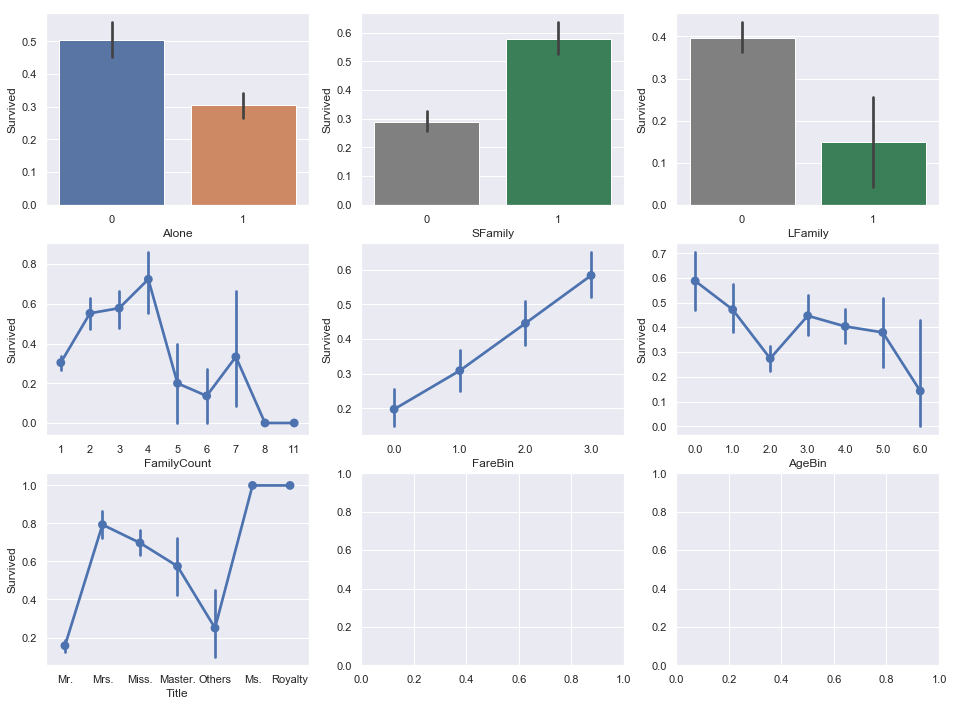

In [21]:
fig, axes = plt.subplots(3, 3,figsize=(16,12))
sns.barplot(x = 'Alone', y = 'Survived',  data=df_train, ax=axes[0,0])
sns.barplot(x = 'SFamily', y = 'Survived',  data=df_train, ax=axes[0,1] , palette=palette)
sns.barplot(x = 'LFamily', y = 'Survived',  data=df_train, ax=axes[0,2], palette=palette)

sns.pointplot(x = 'FamilyCount', y = 'Survived',  data=df_train, ax=axes[1,0])
sns.pointplot(x = 'FareBin', y = 'Survived',  data=df_train, ax=axes[1,1])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=df_train, ax=axes[1,2])

sns.pointplot(x = 'Title', y = 'Survived',  data=df_train, ax=axes[2,0])

plt.show()

In [22]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilyCount    0
Alone          0
SFamily        0
LFamily        0
AgeBin         0
FareBin        0
dtype: int64

In [23]:
X_train_full = one_hot_encode(df_train)
X_train_full.head()

,AgeBin,FareBin,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Pclass_2,...,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Others,Title_Royalty,Embarked_Q,Embarked_S,Alone,SFamily,LFamily
0,2.0,0.0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
1,4.0,3.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,2.0,1.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,3.0,3.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,3.0,1.0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0


In [ ]:
X = X_train_full
y = df_train['Survived']
X.head()

,AgeBin,FareBin,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Pclass_2,...,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Others,Title_Royalty,Embarked_Q,Embarked_S,Alone,SFamily,LFamily
0,2.0,0.0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
1,4.0,3.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,2.0,1.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,3.0,3.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,3.0,1.0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0


In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

C:\Users\jkwd9\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
(cm[0,0] + cm[1,1]) / cm.sum()

0.8146067415730337

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.830183881064
0.0617204538391


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100, 1000] }
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, )
grid_search.fit(X_train,y_train)

best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print(best_accuracy)
print(best_params)

y_pred = grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
print(cm)
print('CF: ' , (cm[0,0] + cm[1,1]) / cm.sum())

0.831460674157
{'C': 0.2}
[[101  15]
 [ 16  46]]
CF:  0.825842696629


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('CF: ' , (cm[0,0] + cm[1,1]) / cm.sum())

[[104  12]
 [ 23  39]]
CF:  0.803370786517


In [ ]:
accuracies = cross_val_score(estimator=rf_classifier, X=X_train, y=y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.832981220657
0.0346106839973


In [ ]:
?RandomForestClassifier

In [ ]:
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 2, 3, 4, 5, 10],
              "min_samples_split": [2, 3, 4, 5, 10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 10],
              "bootstrap": [True,False],
              "n_estimators" :[100,200,300,400,500],
              "criterion": ["gini"]}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=10, scoring='accuracy', n_jobs=3)
grid_search.fit(X_train,y_train)

best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_


print(best_accuracy)
print(best_params)

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
print(cm)
print('CF: ' , (cm[0,0] + cm[1,1]) / cm.sum())

In [ ]:
from xgboost import XGBClassifier


xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

In [ ]:
y_pred = xgb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
accuracies = cross_val_score(estimator=xgb_classifier, X=X_train, y=y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

In [ ]:
xgb_param_grid = {'max_depth':range(3,10),
                  'min_child_weight':range(1,10),
                  'gamma':[1, 0.9, 0.8, 0.7, 0.6, 0.5]}


grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train,y_train)

best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_


print(best_accuracy)
print(best_params)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
df_test = pd.read_csv('test.csv')
df_test = preprocess(df_test)
X_score = one_hot_encode(df_test)
X_score['Fare'] = X_score['Fare'].fillna(X_score['Fare'].mean())


In [ ]:
X_score.head()

In [ ]:
X_score = sc_x.transform(X_score)
y_score = best_model.predict(X_score)

In [ ]:
plt.hist(y_score)
plt.show()

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

In [ ]:
passId = df_test['PassengerId']

df_results = pd.DataFrame({'PassengerId' : passId, 'Survived': y_score})

In [ ]:
df_results.to_csv('results.csv', header=True, index=False)

In [ ]:
df_results.shape